# Working with time series

files needed = (''VIXCLSD-1.csv', 'osk.csv')

Time series data are very common in finance and economics. Date and time systems have their own set of rules and logic, which makes them potentially complicated but powerful. Pandas/python has a very powerful set of tools to handle dates and time. We will work through the basics here. As always, the Internet if full of the details. 

In this workbook we will cover
1. The datetime data type, which is python's representation of a date and time
2. Setting up a DataFrame to index with datetime objects
3. Changing the frequency of our date, e.g., converting daily data to monthly
4. Plotting time series data
5. Slicing on dates

### The packages

In [1]:
import pandas as pd               
import matplotlib.pyplot as plt   

# Data types and methods for dealing with dates and time. Name it dt for short.
import datetime as dt             

# This following is a jupyter magic command. 
# It tells jupyter to insert the plots into the notebook rather than a new window.
%matplotlib inline      

### The datetime type
Python uses the `datetime` type of object to hold date and time data. This allows for very sophisticated handling of time series data. Most of this is beyond the scope of our work, but if you ever find yourself having to deal with time zones or which week of the month a date lies in, datetime has you covered. \[Python was developed to do a lot more than data analysis...\]

We will mostly need to create datetime objects to hold dates. We pass datetime objects to methods that need to know about dates. 

In [2]:
# year, month, date (datetime will add a time code of 00:00:00)
time_1 = dt.datetime(1776, 7, 4)  
print('Declare independence on:', time_1)


Declare independence on: 1776-07-04 00:00:00


### datetime to str
We can convert a datetime object to different string outputs using the `strftime()` method. It takes formatting codes as arguments and you can format the string however you wish. I added a comma. A list of codes is in table 11-3 of McKinney.

In [3]:
# I have no idea why month is 'B'.
print('Declare independence on:', time_1.strftime('%B %d, %Y'))     

Declare independence on: July 04, 1776


### str to datetime

We will often read dates in as strings. Converting them to datetime objects will be one of our first orders of business. We can convert strings to datetime using the same codes and the `strptime()` method. 

We pass it the template the date is written in, and it parses the string to create a datetime. It's flexibility let's us handle strange formats.

In [4]:
# Format codes make for very flexible date input.
# What kind of mad man writes dates this way?
string_date = '1815/1/8'                                 

time_2 = dt.datetime.strptime(string_date, '%Y/%m/%d')
print('Battle in New Orleans on:', time_2.strftime('%B %d, %Y'))

Battle in New Orleans on: January 08, 1815


We might need some more datetime functionality, but that should be enough for now. 

### The data
The file 'VIXCLSD.csv' contains daily end-of-trading values of the '[VIX](https://finance.yahoo.com/quote/%5EVIX/),' a measure of expected market volatility as implied by S&P 500 options. Business-news types like to refer to it as the 'fear index'. \[That's a bit too dramatic for my tastes, but  those guys have ads to sell.\] The idea is that expected volatility rises when people are worried about the future.  

In [5]:
vix = pd.read_csv('vix.csv', na_values='.')   # There are some missing values marked as '.'
print(vix.head())
print('\n', vix.tail())

         DATE  VIXCLS
0  1990-01-02   17.24
1  1990-01-03   18.19
2  1990-01-04   19.22
3  1990-01-05   20.11
4  1990-01-08   20.26

             DATE  VIXCLS
8027  2020-10-08   26.36
8028  2020-10-09   25.00
8029  2020-10-12   25.07
8030  2020-10-13   26.07
8031  2020-10-14   26.40


The data look about like I would expect. What kind of variables do we have? 

In [6]:
print(vix.dtypes)

DATE       object
VIXCLS    float64
dtype: object


The 'DATE' variable is stored as string right now. 

We use the `.to_datetime()` method of **pandas** to convert it to a datetime object.  

In [7]:
vix['DATE'] = pd.to_datetime(vix['DATE'])
vix.dtypes

DATE      datetime64[ns]
VIXCLS           float64
dtype: object

So the `to_datetime()` conversion creates `datetime64[ns]` objects. 

### A datetime in the index

It makes sense to set the index as the unit of observation. In this data, the unit of observation is a time period&mdash;a day. 

There is nothing special here. We set the index as we normally do.

In [8]:
vix_di = vix.set_index('DATE')

print(vix_di.index)

DatetimeIndex(['1990-01-02', '1990-01-03', '1990-01-04', '1990-01-05',
               '1990-01-08', '1990-01-09', '1990-01-10', '1990-01-11',
               '1990-01-12', '1990-01-15',
               ...
               '2020-10-01', '2020-10-02', '2020-10-05', '2020-10-06',
               '2020-10-07', '2020-10-08', '2020-10-09', '2020-10-12',
               '2020-10-13', '2020-10-14'],
              dtype='datetime64[ns]', name='DATE', length=8032, freq=None)


Notice that the index object is now a `DatetimeIndex` object. Now that pandas knows the index is a datetime, it can handle time calculations easily. Let's look at two applications: 

1. Changing the frequency of data
3. Plotting time series data
2. Slicing using dates

### Changing the frequency
We can *resample* the data to change its frequency. 

We are *downsampling* data if we are reducing the number of observations (daily$\rightarrow$monthly) and we are *upsampling* the data if we are increasing the number of observations (monthly$\rightarrow$daily). In my work, I have downsampled a lot. I do not think I have ever upsampled. 

* When we downsample, we need to tell pandas how we want the data aggregated: for example, we might want it summed, or averaged.

* When we resample, we create a new DataFrame to hold the new data. The index in the new data will be of a different frequency than the old data, so it is easiest to have different DataFrames. 

Let's resample to the weekly frequency and take the average over the observations within a week.

In [9]:
# Create a new DataFrame with a weekly index. 
vix_w = vix_di.resample('w').mean()

print(vix_w.index)
print('\n', vix_w.head())

DatetimeIndex(['1990-01-07', '1990-01-14', '1990-01-21', '1990-01-28',
               '1990-02-04', '1990-02-11', '1990-02-18', '1990-02-25',
               '1990-03-04', '1990-03-11',
               ...
               '2020-08-16', '2020-08-23', '2020-08-30', '2020-09-06',
               '2020-09-13', '2020-09-20', '2020-09-27', '2020-10-04',
               '2020-10-11', '2020-10-18'],
              dtype='datetime64[ns]', name='DATE', length=1607, freq='W-SUN')

             VIXCLS
DATE              
1990-01-07  18.690
1990-01-14  21.918
1990-01-21  24.304
1990-01-28  25.744
1990-02-04  25.648


We had 8,032 daily observations. Now we have 1,607 weekly observations.  Note the weeks are Sunday-based (`W-SUN`). Let's downsample some more. 

In [10]:
vix_m = vix_di.resample('m').mean()   # monthly
vix_y = vix_di.resample('y').mean()   # yearly

vix_y.head()

,VIXCLS
DATE,
1990-12-31,23.063478
1991-12-31,18.373373
1992-12-31,15.452047
1993-12-31,12.686245
1994-12-31,13.925516


### Plotting
Now that we have our index set as datetime objects, we can plot the data in sensible ways. In particular, matplotlib can gracefully handle  data at different frequencies.

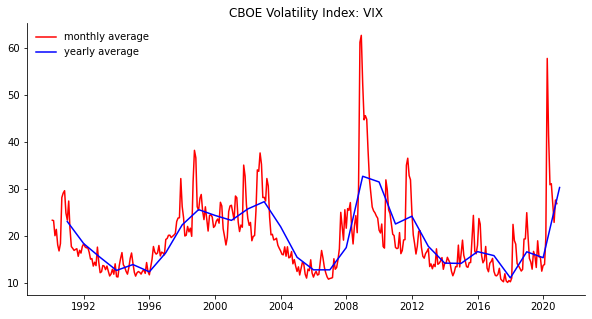

In [11]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(vix_m.index, vix_m['VIXCLS'], color = 'red', label = 'monthly average')
ax.plot(vix_y.index, vix_y['VIXCLS'], color = 'blue', label = 'yearly average')

ax.set_title('CBOE Volatility Index: VIX')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend(frameon=False)

plt.show()

\[You may have received a warning about 'implicitly registered datetime converter...'  It is okay to ignore it. If you run the cell again, the warning will actually go away. \]

If we zoom in tight enough, the time axis will relabel in a natural way to reflect the changed time scale. I am going to "zoom in" by changing the limits of the x-axis so that it covers a short period of time. 


When we refer to coordinates in a time series figure, we pass the x-coordinates as a datetime object. Below, we use datetimes to limit the x-axis and to make some annotations. 

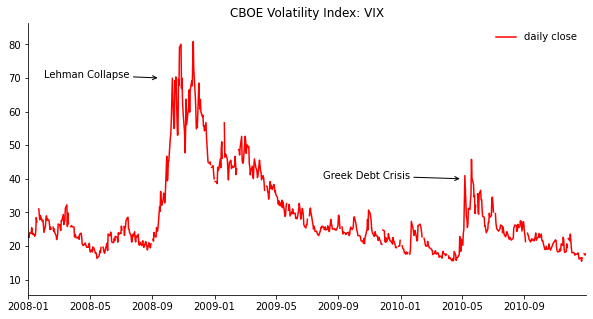

In [12]:
# Any place we need to reference the x axis we use a datetime object.

fig, ax = plt.subplots(figsize=(10,5))

ax.plot(vix_di.index, vix_di['VIXCLS'], color = 'red', label = 'daily close')

# Change the x-axis limits to focus on the recession period. 
# The since the x-axis are dates, the limits are datetime objects.
ax.set_xlim( dt.datetime(2008,1,1), dt.datetime(2010, 12, 31) ) 


# Add some annotations. The x-coordinate needs to be a datetime object
ax.annotate('Lehman Collapse', 
            xy=(dt.datetime(2008,9,15), 70), 
            xytext=(dt.datetime(2008,2,1), 70), 
            arrowprops={'facecolor':'black',  'arrowstyle':'->'}
           ) 

ax.annotate('Greek Debt Crisis', 
            xy=(dt.datetime(2010,5,1), 40), 
            xytext=(dt.datetime(2009,8,1), 40), 
            arrowprops={'facecolor':'black',  'arrowstyle':'->'}
           )

ax.set_title('CBOE Volatility Index: VIX')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend(frameon=False)

plt.show()

### Slicing with dates
An alternative way to 'zoom in' on the data is to plot a slice of the DataFrame, rather than changing the x-axis limits. With an index of datetime, this is surprisingly easy. 

In [13]:
# Two ways to take a subset (in this case one observation) from a dataframe with a datetime index

# Option 1: create a datetime and pass it
date_to_extract = dt.datetime(2008, 6, 18)  # create a datetime with the day I want
print('The vix on', date_to_extract.strftime('%B %d, %Y'), 'is', vix_di.loc[date_to_extract, 'VIXCLS'] )   # extract with with loc[], like usual

# Option 2: Query directly with a string
print('The vix on June 18, 2008 is', vix_di.loc['2008-06-18', 'VIXCLS'])


The vix on June 18, 2008 is 22.24
The vix on June 18, 2008 is 22.24


We can slice, too:
1. We can grab every observation with a year of 2008 with '2008'.
2. We can grab every observation between Jan 1, 2008 and Jan 31, 2008 by slicing with '2008/01/01':'2008/01/31'. Python is smart enough to understand references to dates that are not in the DataFrame. There is no January 1 or January 31 observation.

In [14]:
print('Every week in 2008:', vix_w.loc['2008'])  # all the weeks in 2008
print('\nEvery week in Jan 2008:', vix_w.loc['2008/01/01':'2008/01/31']) # all the weeks in January 2008

Every week in 2008:              VIXCLS
DATE               
2008-01-06  23.0250
2008-01-13  24.0940
2008-01-20  25.2520
2008-01-27  29.2225
2008-02-03  26.5880
2008-02-10  27.7740
2008-02-17  25.8740
2008-02-24  24.7925
2008-03-02  23.5380
2008-03-09  26.2880
2008-03-16  28.2820
2008-03-23  28.6225
2008-03-30  25.8240
2008-04-06  23.4760
2008-04-13  22.6060
2008-04-20  21.5260
2008-04-27  20.2560
2008-05-04  19.5460
2008-05-11  19.1300
2008-05-18  17.2400
2008-05-25  18.1560
2008-06-01  18.6700
2008-06-08  20.6120
2008-06-15  22.9940
2008-06-22  21.7540
2008-06-29  22.7140
2008-07-06  24.5750
2008-07-13  25.4480
2008-07-20  26.2360
2008-07-27  22.3780
2008-08-03  22.5960
2008-08-10  21.3340
2008-08-17  20.5520
2008-08-24  20.2620
2008-08-31  20.2600
2008-09-07  22.6275
2008-09-14  24.5360
2008-09-21  32.6780
2008-09-28  34.4640
2008-10-05  43.2640
2008-10-12  59.4260
2008-10-19  63.4620
2008-10-26  64.5320
2008-11-02  67.9540
2008-11-09  55.1500
2008-11-16  62.8040
2008-11-23  72.9160


### Practice: Dates
Take a few minutes and try the following. Feel free to chat with those around if you get stuck. The TA and I are here, too.

1. Read the file 'osk.csv' into a DataFrame. The file contains daily closing prices for OshKosh Corp. and the S&P500. 
2. Set the index to the date. Make sure the dates are datetime objects!


In [20]:
osk = pd.read_csv("osk.csv")
osk['Date'] = pd.to_datetime(osk['Date'])
osk1 = osk.set_index('Date')

osk1.head(5)


,osk,sp500
Date,,
2018-01-02,92.169998,2695.810059
2018-01-03,92.029999,2713.060059
2018-01-04,91.279999,2723.989990
2018-01-05,89.970001,2743.149902
2018-01-08,90.660004,2747.709961


3. *Normalize* each series (osk, sp500) by dividing every observation by the value at 01-02-2018. Try 
```python
prices['osk_n'] = prices['osk'] / prices.loc['2018-01-02,','osk']
```
and something similar for the S&P500.

In [31]:
osk1['osk_n'] = osk1['osk'] / osk1.loc['2018-01-02','osk']
osk1['sp500_n'] = osk1['sp500'] / osk1.loc['2018-01-02','sp500']
osk1.head(3)

,osk,sp500,osk_n,sp500_n
Date,,,,
2018-01-02,92.169998,2695.810059,1.000000,1.000000
2018-01-03,92.029999,2713.060059,0.998481,1.006399
2018-01-04,91.279999,2723.989990,0.990344,1.010453


4. Plot the two normalized series. What does normalizing do for us?

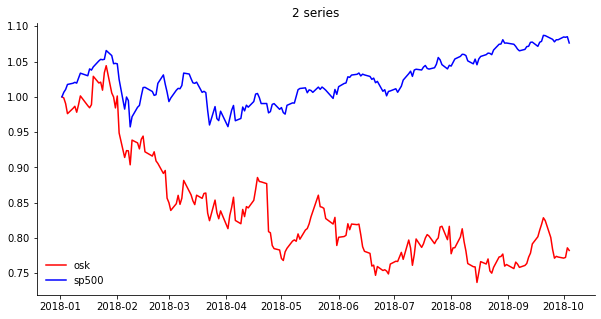

In [32]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(osk1.index, osk1['osk_n'], color = 'red', label = 'osk')
ax.plot(osk1.index, osk1['sp500_n'], color = 'blue', label = 'sp500')

ax.set_title('2 series')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend(frameon=False)

plt.show()

5. Resample the data to a weekly frequency, creating average weekly prices. 
6. Normalize the tow weekly series, like you did 3., but this time dividing by the first week of the year.
7. Add the weekly data to your figure from part 4. Use the `alpha` option to lighten up the daily data lines. 
8. How does your plot look? Are the titles correct? Is there a legend or some other way of identifying the lines?

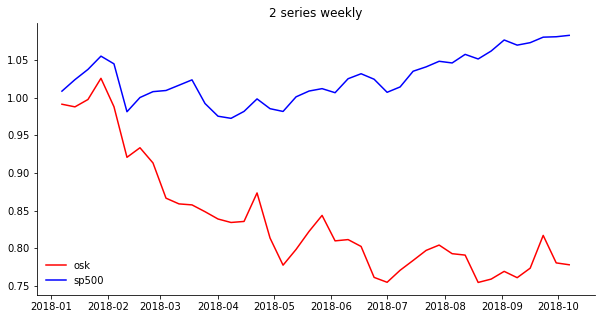

In [36]:
#5
price_w = osk1.resample('w').mean()
price_w.head(3)

#6
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(price_w.index, price_w['osk_n'], color = 'red', label = 'osk')
ax.plot(price_w.index, price_w['sp500_n'], color = 'blue', label = 'sp500')

ax.set_title('2 series weekly')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend(frameon=False)

plt.show()

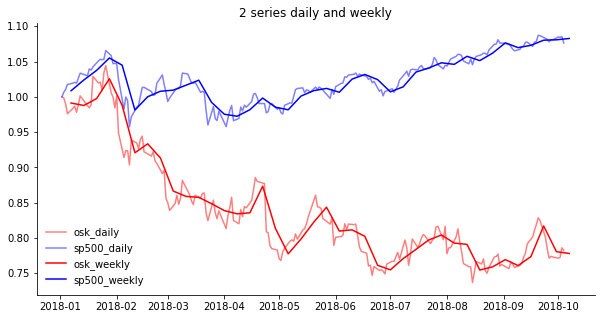

In [37]:
fig, ax = plt.subplots(figsize=(10,5))


ax.plot(osk1.index, osk1['osk_n'], color = 'red', label = 'osk_daily', alpha = 0.5)
ax.plot(osk1.index, osk1['sp500_n'], color = 'blue', label = 'sp500_daily', alpha = 0.5)
ax.plot(price_w.index, price_w['osk_n'], color = 'red', label = 'osk_weekly')
ax.plot(price_w.index, price_w['sp500_n'], color = 'blue', label = 'sp500_weekly')

ax.set_title('2 series daily and weekly')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend(frameon=False)

plt.show()